In [73]:

import pandas as pd
import re




In [74]:
# Load the true news data from an Excel file
true_news = pd.read_excel(r"C:\Users\vaibh\Desktop\dataset combine\truecombine.xlsx")

# Load the fake news data from an Excel file
fake_news = pd.read_excel(r"C:\Users\vaibh\Desktop\2023\fakecombine.xlsx")

In [75]:
#null values in fake news
fake_news.isnull().sum(axis = 0)

Column1              0
short_description    0
dtype: int64

In [76]:
fake_news

,Column1,short_description
0,1,गडकरी ने नहीं दिया है पीएम मोदी और राम मंदिर ...
1,2,राम मंदिर वहीं बना है जहां रामलला विराजमान थे...
2,3,"यूपी में बोर्ड की परीक्षा नहीं हुई है रद्द, य..."
3,4,"नेपाल से अयोध्या के जुलूस का नहीं, ये ग्रेटर ..."
4,5,एमपी का सीएम बनने के बाद मोहन यादव ने दी जनता...
...,...,...
2699,2700,राजस्थान की महिला MLA की छवि खराब करने के लि...
2700,2701,मध्य प्रदेश की साल 2019 की घटना को हालिया बत...
2701,2702,"खुर्जा में बोइंग का वेयरहाउस खुला, लेकिन वायर..."
2702,2703,जलते हुए समुद्री जहाज का यह वीडियो 2020 का है...


In [77]:
#null values in fake news
true_news.isnull().sum(axis = 0)

Column1              0
short_description    0
dtype: int64

In [78]:
true_news

,Column1,short_description
0,1,राम मंदिर प्राण-प्रतिष्ठा: फर्श पर सोना-नारियल...
1,2,Ayodhya Ram Mandir Pran Pratishtha से पहले कठि...
2,3,8 PHOTOS:देखें रामलला की प्राण-प्रतिष्ठा से पह...
3,4,"22 जनवरी को अयोध्या में कैसा रहेगा मौसम, जानें..."
4,5,"सोलापुर में PM की 15 बड़ी बातें, मोदी के 22 जन..."
...,...,...
4015,4016,प्राण प्रतिष्ठा की अयोध्या से लेकर कैलिफोर्निय...
4016,4017,छक्का जड़ने पर मिलेंगे 12 रन... जल्द आएगा नया ...
4017,4018,Power Consumption: चालू वित्त वर्ष की अप्रैल-द...
4018,4019,Entertainment Top 5 News 21 Jan: 'फाइटर' में क...


In [79]:
true_news.head()

,Column1,short_description
0,1,राम मंदिर प्राण-प्रतिष्ठा: फर्श पर सोना-नारियल...
1,2,Ayodhya Ram Mandir Pran Pratishtha से पहले कठि...
2,3,8 PHOTOS:देखें रामलला की प्राण-प्रतिष्ठा से पह...
3,4,"22 जनवरी को अयोध्या में कैसा रहेगा मौसम, जानें..."
4,5,"सोलापुर में PM की 15 बड़ी बातें, मोदी के 22 जन..."


In [80]:
# Drop unnecessary columns from both dataframes
true_news=true_news.drop(['Column1'],axis=1)
fake_news=fake_news.drop(['Column1'],axis=1)

In [81]:
true_news.head()

,short_description
0,राम मंदिर प्राण-प्रतिष्ठा: फर्श पर सोना-नारियल...
1,Ayodhya Ram Mandir Pran Pratishtha से पहले कठि...
2,8 PHOTOS:देखें रामलला की प्राण-प्रतिष्ठा से पह...
3,"22 जनवरी को अयोध्या में कैसा रहेगा मौसम, जानें..."
4,"सोलापुर में PM की 15 बड़ी बातें, मोदी के 22 जन..."


In [82]:
fake_news.head()

,short_description
0,गडकरी ने नहीं दिया है पीएम मोदी और राम मंदिर ...
1,राम मंदिर वहीं बना है जहां रामलला विराजमान थे...
2,"यूपी में बोर्ड की परीक्षा नहीं हुई है रद्द, य..."
3,"नेपाल से अयोध्या के जुलूस का नहीं, ये ग्रेटर ..."
4,एमपी का सीएम बनने के बाद मोहन यादव ने दी जनता...


In [83]:
fake_news=fake_news.dropna()
true_news=true_news.dropna()

In [84]:
fake_news

,short_description
0,गडकरी ने नहीं दिया है पीएम मोदी और राम मंदिर ...
1,राम मंदिर वहीं बना है जहां रामलला विराजमान थे...
2,"यूपी में बोर्ड की परीक्षा नहीं हुई है रद्द, य..."
3,"नेपाल से अयोध्या के जुलूस का नहीं, ये ग्रेटर ..."
4,एमपी का सीएम बनने के बाद मोहन यादव ने दी जनता...
...,...
2699,राजस्थान की महिला MLA की छवि खराब करने के लि...
2700,मध्य प्रदेश की साल 2019 की घटना को हालिया बत...
2701,"खुर्जा में बोइंग का वेयरहाउस खुला, लेकिन वायर..."
2702,जलते हुए समुद्री जहाज का यह वीडियो 2020 का है...


In [85]:
true_news

,short_description
0,राम मंदिर प्राण-प्रतिष्ठा: फर्श पर सोना-नारियल...
1,Ayodhya Ram Mandir Pran Pratishtha से पहले कठि...
2,8 PHOTOS:देखें रामलला की प्राण-प्रतिष्ठा से पह...
3,"22 जनवरी को अयोध्या में कैसा रहेगा मौसम, जानें..."
4,"सोलापुर में PM की 15 बड़ी बातें, मोदी के 22 जन..."
...,...
4015,प्राण प्रतिष्ठा की अयोध्या से लेकर कैलिफोर्निय...
4016,छक्का जड़ने पर मिलेंगे 12 रन... जल्द आएगा नया ...
4017,Power Consumption: चालू वित्त वर्ष की अप्रैल-द...
4018,Entertainment Top 5 News 21 Jan: 'फाइटर' में क...


In [86]:

import re

for i in list(true_news):
    # Define a list of characters to remove
    characters_to_remove = ['|', '?', ':', ';', "'", '"', ',', '.', '(', ')', '\n', '&','।']
    
    # Use a regular expression to replace all characters in the list
    pattern = '|'.join(map(re.escape, characters_to_remove))
    true_news[i] = true_news[i].str.replace(pattern, '', regex=True)

In [87]:
import re

for j in list(fake_news):
    # Define a list of characters to remove
    characters_to_remove = ['|', '?', ':', ';', "'", '"', ',', '.', '(', ')', '\n', '&','।']
    
    # Use a regular expression to replace all characters in the list
    pattern = '|'.join(map(re.escape, characters_to_remove))
    fake_news[j] = fake_news[j].str.replace(pattern, '', regex=True)

In [88]:
# Define stemming function for Hindi text
suffixes = {
    1: ["ो", "े", "ू", "ु", "ी", "ि", "ा"],
    2: ["कर", "ाओ", "िए", "ाई", "ाए", "ने", "नी", "ना", "ते", "ीं", "ती", "ता", "ाँ", "ां", "ों", "ें"],
    3: ["ाकर", "ाइए", "ाईं", "ाया", "ेगी", "ेगा", "ोगी", "ोगे", "ाने", "ाना", "ाते", "ाती", "ाता", "तीं", "ाओं", "ाएं", "ुओं", "ुएं", "ुआं"],
    4: ["ाएगी", "ाएगा", "ाओगी", "ाओगे", "एंगी", "ेंगी", "एंगे", "ेंगे", "ूंगी", "ूंगा", "ातीं", "नाओं", "नाएं", "ताओं", "ताएं", "ियाँ", "ियों", "ियां"],
    5: ["ाएंगी", "ाएंगे", "ाऊंगी", "ाऊंगा", "ाइयाँ", "ाइयों", "ाइयां"],
}

def hi_stem(word):
    for L in 5, 4, 3, 2, 1:
        if len(word) > L + 1:
            for suf in suffixes[L]:
                if word.endswith(suf):
                    return word[:-L]
    return word

In [89]:
# Index lists containing indices of rows in fake_news and true_news DataFrames
id=list(fake_news.index)
id1=list(true_news.index)

In [90]:
# Initialize an empty string variable to store the stemmed text
str_temp = ""

# Loop through each column in the fake_news DataFrame
for i in list(fake_news):
    # Initialize a counter variable to keep track of row indices
    count = 0
    
    # Loop through each row in the current column
    for j in list(fake_news[i]):
        # Loop through each word in the current text
        for words in j.split():
            # Apply Hindi stemming function to each word and concatenate them
            str_temp += hi_stem(words)
            str_temp += " "
        
        # Update the text in the corresponding cell of the fake_news DataFrame with the stemmed text
        fake_news.loc[id[count], i] = str_temp
        
        # Reset the temporary string variable for the next row
        str_temp = ""
        
        # Increment the row index counter
        count += 1

In [91]:

# Initialize an empty string variable to store the stemmed text
str_temp = ""

# Loop through each column in the true_news DataFrame
for i in list(true_news):
    # Initialize a counter variable to keep track of row indices
    count = 0
    
    # Loop through each row in the current column
    for j in list(true_news[i]):
        # Loop through each word in the current text
        for words in j.split():
            # Apply Hindi stemming function to each word and concatenate them
            str_temp += hi_stem(words)
            str_temp += " "
        
        # Update the text in the corresponding cell of the true_news DataFrame with the stemmed text
        true_news.loc[id1[count], i] = str_temp
        
        # Reset the temporary string variable for the next row
        str_temp = ""
        
        # Increment the row index counter
        count += 1

In [92]:
fake_news.head()

,short_description
0,गडकर ने नह दिय है पीएम मोद और राम मंदिर से जुड...
1,राम मंदिर वह बन है जह रामलल विराजमान थे बाबर स...
2,यूप में बोर्ड की परीक्ष नह हुई है रद्द ये वीडि...
3,नेपाल से अयोध्य के जुलूस का नह ये ग्रेटर नोएड ...
4,एमप का सीएम बन के बाद मोहन यादव ने दी जन को गा...


In [93]:
true_news


,short_description
0,राम मंदिर प्राण-प्रतिष्ठ फर्श पर सोना-नारियल प...
1,Ayodhya Ram Mandir Pran Pratishtha से पहल कठिन...
2,8 PHOTOSदेख रामलल की प्राण-प्रतिष्ठ से पहल कैस...
3,22 जनवर को अयोध्य में कैस रह मौसम जान क्य है I...
4,सोलापुर में PM की 15 बड़ बात मोद के 22 जनवर बो...
...,...
4015,प्राण प्रतिष्ठ की अयोध्य से ले कैलिफोर्निय तक ...
4016,छक्क जड़ पर मिल 12 रन जल्द आएग नय नियम! रोहित ...
4017,Power Consumption चाल वित्त वर्ष की अप्रैल-दिस...
4018,Entertainment Top 5 News 21 Jan फाइटर में किए ...


In [94]:
# Open the file containing stopwords for Hindi text
stop = open(r"D:\fake review\final_stopwords.txt", encoding="utf-8")

# Initialize an empty list to store the stopwords
stopwords = []

# Loop through each line in the file
for x in stop:
    # Remove the newline character from each line and append the word to the stopwords list
    x = x.replace('\n', '')
    stopwords.append(x)

In [95]:
# Initialize an empty string variable to store the filtered text
str_temp = ""

# Initialize a counter variable to keep track of row indices
count = 0

# Loop through each column in the fake_news DataFrame
for i in list(fake_news):
    # Reset the row index counter
    count = 0
    
    # Loop through each row in the current column
    for j in list(fake_news[i]):
        # Loop through each word in the current text
        for words in j.split():
            # Check if the word is not in the list of stopwords
            if words not in stopwords:
                # Append the word to the filtered text
                str_temp += words
                str_temp += " "
        
        # Update the text in the corresponding cell of the fake_news DataFrame with the filtered text
        fake_news.loc[id[count], i] = str_temp
        
        # Reset the temporary string variable for the next row
        str_temp = ""
        
        # Increment the row index counter
        count += 1


In [96]:
# Initialize an empty string variable to store the filtered text
str_temp = ""

# Initialize a counter variable to keep track of row indices
count = 0

# Loop through each column in the true_news DataFrame
for i in list(true_news):
    # Reset the row index counter
    count = 0
    
    # Loop through each row in the current column
    for j in list(true_news[i]):
        # Loop through each word in the current text
        for words in j.split():
            # Check if the word is not in the list of stopwords
            if words not in stopwords:
                # Append the word to the filtered text
                str_temp += words
                str_temp += " "
        
        # Update the text in the corresponding cell of the true_news DataFrame with the filtered text
        true_news.loc[id1[count], i] = str_temp
        
        # Reset the temporary string variable for the next row
        str_temp = ""
        
        # Increment the row index counter
        count += 1


In [97]:
fake_news.head()

,short_description
0,गडकर नह दिय पीएम मोद राम मंदिर जुड़ विवादित बयान
1,राम मंदिर बन जह रामलल विराजमान बाबर तीन किलोमी...
2,यूप बोर्ड परीक्ष नह रद्द वीडिय पूर फर्ज
3,नेपाल अयोध्य के जुलूस नह ग्रेटर नोएड कलश यात्र...
4,एमप सीएम बन के मोहन यादव दी जन गाल वीडिय सच


In [98]:
true_news.head()

,short_description
0,राम मंदिर प्राण-प्रतिष्ठ फर्श सोना-नारियल पा प...
1,Ayodhya Ram Mandir Pran Pratishtha पहल कठिन तप...
2,8 PHOTOSदेख रामलल प्राण-प्रतिष्ठ पहल कैस सज अय...
3,22 जनवर अयोध्य कैस रह मौसम जान क्य IMD भविष्यवाण
4,सोलापुर PM 15 बड़ बात मोद के 22 जनवर बोल चार त...


In [99]:
# Assigning labels to distinguish between true and fake news
true_news['label'] = "true"
fake_news['label'] = "false"

# Concatenate the true_news and fake_news DataFrames to create a single DataFrame containing both types of news
news = pd.concat([fake_news, true_news])


In [100]:
news.tail()

,short_description,label
4015,प्राण प्रतिष्ठ अयोध्य ले कैलिफोर्निय धूम कार र...,true
4016,छक्क जड़ मिल 12 रन जल्द आएग नय नियम! रोहित के ...,true
4017,Power Consumption चाल वित्त वर्ष अप्रैल-दिसंबर...,true
4018,Entertainment Top 5 News 21 Jan फाइटर बड़ बदला...,true
4019,Ram Mandir के सालार के मेकर्स तैयार किय रामचंद...,true


In [101]:
news.head()

,short_description,label
0,गडकर नह दिय पीएम मोद राम मंदिर जुड़ विवादित बयान,false
1,राम मंदिर बन जह रामलल विराजमान बाबर तीन किलोमी...,false
2,यूप बोर्ड परीक्ष नह रद्द वीडिय पूर फर्ज,false
3,नेपाल अयोध्य के जुलूस नह ग्रेटर नोएड कलश यात्र...,false
4,एमप सीएम बन के मोहन यादव दी जन गाल वीडिय सच,false


In [102]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import fasttext
import fasttext.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [103]:
# Load your FastText word embeddings model
fasttext.util.download_model('hi', if_exists='ignore')  # Download the FastText model if not already downloaded
ft = fasttext.load_model('cc.hi.300.bin')

In [104]:
# Assigning the entire 'news' DataFrame to the training_data variable
# This assumes that the 'news' DataFrame contains the combined dataset of both true and fake news
training_data = news

# Define the maximum sequence length for padding sequences
# This determines the maximum length of sequences after tokenization and padding
max_sequence_length = 300


In [105]:
# Initialize an empty list to store the binary labels
all_labels = list()

# Iterate through each value in the second column of the 'news' DataFrame
# Assuming the second column contains the labels ('true' or 'false')
for i in news.iloc[:, 1]:
    # Check if the label is 'false', assign 0 as the binary label
    if i == 'false':
        all_labels.append(0)
    # If the label is not 'false', assign 1 as the binary label
    else:
        all_labels.append(1)



In [106]:
# Initialize a Tokenizer object
tokenizer = Tokenizer()

# Fit the tokenizer on the text data in the first column of the training_data DataFrame
tokenizer.fit_on_texts(training_data.iloc[:, 0])

# Convert the text data into sequences of integers using the fitted tokenizer
sequences = tokenizer.texts_to_sequences(training_data.iloc[:, 0])

# Pad the sequences to ensure uniform length
# 'maxlen' parameter specifies the maximum sequence length
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Retrieve the word index dictionary from the tokenizer
word_index = tokenizer.word_index


In [107]:
# Determine the vocabulary size by counting the number of unique words in the word index dictionary
voc_size = len(word_index)

# Print the vocabulary size to the console
print("Vocabulary Size:", voc_size)


Vocabulary Size: 6680


In [108]:
word_index

{'के': 1,
 'वीडिय': 2,
 'किय': 3,
 'रह': 4,
 'वायरल': 5,
 'नह': 6,
 'दाव': 7,
 'फर्ज': 8,
 'बन': 9,
 'वाल': 10,
 'मंदिर': 11,
 'राम': 12,
 'जान': 13,
 'बत': 14,
 'बड़': 15,
 'गय': 16,
 'साल': 17,
 'मोद': 18,
 'मिल': 19,
 'लग': 20,
 'बढ़': 21,
 'सरकार': 22,
 'देख': 23,
 'तस्वीर': 24,
 'भारत': 25,
 '22': 26,
 'दिख': 27,
 'क्य': 28,
 'होग': 29,
 'शेयर': 30,
 'अयोध्य': 31,
 'फिल्म': 32,
 'सक': 33,
 'पीएम': 34,
 'यूप': 35,
 'भ्रामक': 36,
 'इसक': 37,
 'ले': 38,
 'लव': 39,
 'लाल': 40,
 'यात्र': 41,
 'अमेरिक': 42,
 'प्राण': 43,
 'प्रतिष्ठ': 44,
 '2024': 45,
 'जगह': 46,
 'पत्र': 47,
 'पुर': 48,
 'होंग': 49,
 'ढांच': 50,
 'श्रीराम': 51,
 'दिय': 52,
 'महिल': 53,
 'भगवान': 54,
 'सहित': 55,
 'रूस': 56,
 'जय': 57,
 'जल्द': 58,
 'भव्य': 59,
 'भर्': 60,
 'mandir': 61,
 'कहा': 62,
 'ram': 63,
 'up': 64,
 'pran': 65,
 'pratishtha': 66,
 'मंत्र': 67,
 'bharti': 68,
 'दिल्ल': 69,
 'दे': 70,
 'पाकिस्तान': 71,
 'भारतीय': 72,
 'मामल': 73,
 'मौत': 74,
 'दिन': 75,
 'राजस्थान': 76,
 'घट': 77,
 'बोल': 78,
 'तीन'

In [109]:
# Define the dimensionality of the word embeddings (should match the dimensionality of the FastText model)
embedding_dim = 300  # Adjust the dimension based on your FastText model

# Create an empty embedding matrix with dimensions (vocabulary size + 1) x embedding_dim
# The additional row is for the padding token
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

# Retrieve the length of the embedding matrix (number of rows)
# This should be equal to the size of the vocabulary plus one
# (to accommodate the padding token)
len(embedding_matrix)


6681

In [110]:
# Iterate through each word-index pair in the word index dictionary
for word, i in word_index.items():
    # Print the index of the current word
    print(i)
    
    # Check if the current word is present in the FastText model vocabulary
    if word in ft.words:
        # If the word is found in the FastText model vocabulary,
        # retrieve its corresponding embedding vector and assign it to the corresponding row in the embedding matrix
        embedding_matrix[i] = ft[word]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [111]:
# Build the Sequential model using Keras
model = Sequential()

# Add an embedding layer to the model using the FastText embeddings
# The embedding layer is initialized with the pre-trained embedding matrix
# 'len(word_index) + 1' specifies the input dimension (vocabulary size + 1)
# 'embedding_dim' specifies the dimensionality of the word embeddings
# 'weights=[embedding_matrix]' initializes the embedding layer with pre-trained weights
# 'input_length=max_sequence_length' specifies the length of input sequences
# 'trainable=False' ensures that the embedding weights are not updated during training
model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))


In [112]:
# Add a 1D convolutional layer to the model
# 'filters=64' specifies the number of filters in the convolutional layer
# 'kernel_size=5' specifies the size of the convolutional kernel
# 'activation='relu'' specifies the activation function (Rectified Linear Unit)
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))


In [113]:
# Add a MaxPooling1D layer
model.add(MaxPooling1D(pool_size=2))

In [114]:
# Add an LSTM layer
model.add(LSTM(64, activation='linear'))

In [115]:
model.add(Flatten())

# Add the first Dense layer with a unique name
model.add(Dense(64, activation='relu', name='dense_1'))

# Add the second Dense layer with a unique name
model.add(Dense(32, activation='relu', name='dense_2'))

# Add the final Dense layer for binary classification with a unique name
model.add(Dense(1, activation='sigmoid', name='dense_output'))

In [116]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [117]:
# Convert the list of binary labels to a pandas Series
all_labels = pd.Series(all_labels)

# Split the data into training and testing sets using train_test_split function
# 'sequences' are the input sequences
# 'all_labels' are the corresponding binary labels
# 'test_size=0.2' specifies that 20% of the data will be used for testing
# 'stratify=news['label']' ensures that the class distribution is preserved in the split
# 'random_state=40' sets the random seed for reproducibility
# 'shuffle=True' shuffles the data before splitting
train, test, labels, y_test = train_test_split(sequences, all_labels, test_size=0.2, stratify=news['label'], random_state=40, shuffle=True)

# Print the shape of the training data
print(train.shape)  # Should be (number_of_samples, max_sequence_length)

# Print the length of the labels array
print(len(labels))


(5379, 300)
5379


In [118]:
# Train the model using the training data and labels
# 'train' is the input training data (sequences)
# 'labels' are the corresponding binary labels
# 'epochs=10' specifies the number of training epochs
# 'batch_size=64' specifies the batch size for training
model.fit(train, labels, epochs=10, batch_size=64)


Epoch 1/10
85/85 [==============================] - 8s 76ms/step - loss: 0.2472 - accuracy: 0.8905
Epoch 2/10
85/85 [==============================] - 7s 78ms/step - loss: 0.0740 - accuracy: 0.9727
Epoch 3/10
85/85 [==============================] - 7s 78ms/step - loss: 0.0435 - accuracy: 0.9835
Epoch 4/10
85/85 [==============================] - 7s 86ms/step - loss: 0.0249 - accuracy: 0.9918
Epoch 5/10
85/85 [==============================] - 9s 101ms/step - loss: 0.0110 - accuracy: 0.9972
Epoch 6/10
85/85 [==============================] - 8s 93ms/step - loss: 0.0157 - accuracy: 0.9944
Epoch 7/10
85/85 [==============================] - 8s 94ms/step - loss: 0.0067 - accuracy: 0.9983
Epoch 8/10
85/85 [==============================] - 8s 94ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 9/10
85/85 [==============================] - 8s 94ms/step - loss: 4.1408e-04 - accuracy: 1.0000
Epoch 10/10
85/85 [==============================] - 8s 95ms/step - loss: 2.0066e-04 - accuracy: 1.0000


In [119]:
from tensorflow.keras import backend as K
K.clear_session()

In [120]:
# Save the trained model if needed
model.save('fake_news_detection_model.h5')

C:\Users\vaibh\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [121]:
test_res = model.predict(test)

43/43 [==============================] - 1s 24ms/step


In [122]:
# Convert probabilities to binary predictions using a threshold
binary_predictions = [1 if pred > 0.5 else 0 for pred in test_res]

# Compute accuracy
score = accuracy_score(y_test, binary_predictions)
print(score)

0.9843866171003718


In [123]:
# Compute evaluation metrics
print("Accuracy:", accuracy_score(y_test, binary_predictions))
print("Recall:", recall_score(y_test, binary_predictions))
print("Precision:", precision_score(y_test, binary_predictions))
print("F1 Score:", f1_score(y_test, binary_predictions))

Accuracy: 0.9843866171003718
Recall: 0.9900497512437811
Precision: 0.9839307787391842
F1 Score: 0.9869807811531309


Confusion Matrix:
[[528  13]
 [  8 796]]


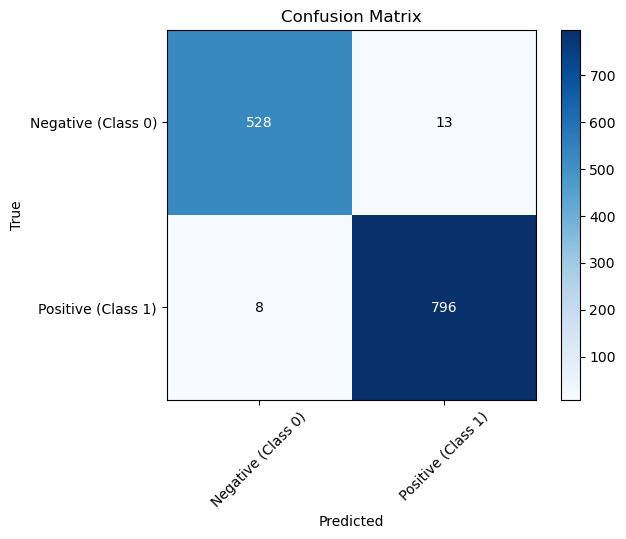

In [124]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confusion matrix using the actual labels (y_test) and predicted labels (binary_predictions)
conf_matrix = confusion_matrix(y_test, binary_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using Matplotlib
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Define class labels for the confusion matrix
classes = ['Negative (Class 0)', 'Positive (Class 1)']

# Set tick marks for the x and y axes
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Set labels for x and y axes
plt.xlabel('Predicted')
plt.ylabel('True')

# Add text annotations to each cell of the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > (conf_matrix.max() / 2) else 'black')

# Show the plot
plt.show()
